# Exam 1
Jiade Song

1. 

Both values could be the correct amount, which depend on the average MPG_city. These two variables have some interactions. According to the scattered graph in Lecture 5, the USA origin cars in the sample are more likely to have a smaller value in  MPG_city on average than the average MPG_city of non-USA. However, for the model m1, we igore the interaction and assume that USA and non-USA cars have the same distribution on MPG_city, which will lead to a increase in the average amount difference. If we consider the interaction and bring that into the model, this will result in a small difference, which is 2000. 

2. 

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [3]:
df1 = pd.read_csv('air.csv')
df1['Date1'] = pd.to_datetime(df1['date'],\
format='%m/%d/%y')
df2 = df1.drop(columns = 'date').copy()
df2

,demand,Date1
0,112.0,2000-01-01
1,118.0,2000-02-01
2,132.0,2000-03-01
3,129.0,2000-04-01
4,121.0,2000-05-01
...,...,...
151,NaN,2012-08-01
152,NaN,2012-09-01
153,NaN,2012-10-01
154,NaN,2012-11-01


In [4]:
df2['Year'] = df2['Date1'].dt.year
df2['Month'] = df2['Date1'].dt.month
df2

,demand,Date1,Year,Month
0,112.0,2000-01-01,2000,1
1,118.0,2000-02-01,2000,2
2,132.0,2000-03-01,2000,3
3,129.0,2000-04-01,2000,4
4,121.0,2000-05-01,2000,5
...,...,...,...,...
151,NaN,2012-08-01,2012,8
152,NaN,2012-09-01,2012,9
153,NaN,2012-10-01,2012,10
154,NaN,2012-11-01,2012,11


In [5]:
df2.dtypes

demand           float64
Date1     datetime64[ns]
Year               int64
Month              int64
dtype: object

In [6]:
df2['Month'] = df2['Month'].astype(object)

a)

In [7]:
m1 = smf.ols(formula = 'demand~Year + Month',data = df2).fit()
m1.params

Intercept     -63781.733829
Month[T.2]        -6.750000
Month[T.3]        28.416667
Month[T.4]        25.333333
Month[T.5]        30.083333
Month[T.6]        69.916667
Month[T.7]       109.583333
Month[T.8]       109.333333
Month[T.9]        60.666667
Month[T.10]       24.833333
Month[T.11]       -8.916667
Month[T.12]       20.083333
Year              31.923951
dtype: float64

In [8]:
m1.rsquared

0.9558707271418253

### R-square is 0.956. 

In [9]:
yhat = m1.predict(df2)
df2['yhat'] = yhat
df2

,demand,Date1,Year,Month,yhat
0,112.0,2000-01-01,2000,1,66.168269
1,118.0,2000-02-01,2000,2,59.418269
2,132.0,2000-03-01,2000,3,94.584936
3,129.0,2000-04-01,2000,4,91.501603
4,121.0,2000-05-01,2000,5,96.251603
...,...,...,...,...,...
151,NaN,2012-08-01,2012,8,558.589015
152,NaN,2012-09-01,2012,9,509.922348
153,NaN,2012-10-01,2012,10,474.089015
154,NaN,2012-11-01,2012,11,440.339015


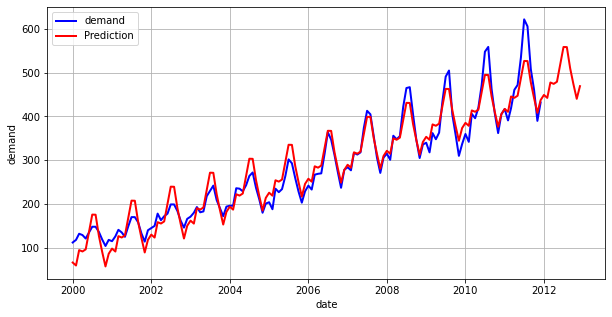

In [10]:
plt.figure(figsize = (10,5))
plt.plot(df1['Date1'],df1['demand'],\
linewidth = 2, c='b', label='demand')
Prediction, = plt.plot(df2['Date1'],df2['yhat'],\
linewidth = 2, c='r', label='Prediction')

plt.xlabel('date')
plt.ylabel('demand')
plt.legend()
plt.grid()

b)

In [11]:
m2 = smf.ols(formula = 'demand~Year * Month',data = df2).fit()
m2.params

Intercept          -55484.503496
Month[T.2]           6521.643358
Month[T.3]            217.747086
Month[T.4]          -3200.296039
Month[T.5]          -7465.998836
Month[T.6]         -18323.182984
Month[T.7]         -30723.226110
Month[T.8]         -30127.435896
Month[T.9]         -12645.508157
Month[T.10]         -5374.589745
Month[T.11]          3139.578088
Month[T.12]         -1122.911422
Year                   27.786713
Year:Month[T.2]        -3.255245
Year:Month[T.3]        -0.094406
Year:Month[T.4]         1.608392
Year:Month[T.5]         3.737762
Year:Month[T.6]         9.171329
Year:Month[T.7]        15.374126
Year:Month[T.8]        15.076923
Year:Month[T.9]         6.335664
Year:Month[T.10]        2.692308
Year:Month[T.11]       -1.569930
Year:Month[T.12]        0.569930
dtype: float64

In [12]:
yhat2 = m2.predict(df2)
df2['yhat2'] = yhat2
df2[:6]

,demand,Date1,Year,Month,yhat,yhat2
0,112.0,2000-01-01,2000,1,66.168269,88.923077
1,118.0,2000-02-01,2000,2,59.418269,100.076923
2,132.0,2000-03-01,2000,3,94.584936,117.858974
3,129.0,2000-04-01,2000,4,91.501603,105.410256
4,121.0,2000-05-01,2000,5,96.251603,98.448718
5,135.0,2000-06-01,2000,6,136.084936,108.397436


In [13]:
predictions = m2.get_prediction(df2)
df3 = predictions.summary_frame(alpha=0.05)
df3[:5]

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,88.923077,8.699408,71.698854,106.147300,52.828962,125.017192
1,100.076923,8.699408,82.852700,117.301146,63.982807,136.171038
2,117.858974,8.699408,100.634752,135.083197,81.764859,153.953090
3,105.410256,8.699408,88.186034,122.634479,69.316141,141.504372
4,98.448718,8.699408,81.224495,115.672940,62.354602,134.542833


In [14]:
df3 = predictions.summary_frame(alpha=0.05).iloc[:,[2,3]]
df3.columns = ['lower','upper']
df3[:5]

,lower,upper
0,71.698854,106.147300
1,82.852700,117.301146
2,100.634752,135.083197
3,88.186034,122.634479
4,81.224495,115.672940


In [15]:
df4 = pd.concat([df2,df3], axis=1)
df4[:9]

,demand,Date1,Year,Month,yhat,yhat2,lower,upper
0,112.0,2000-01-01,2000,1,66.168269,88.923077,71.698854,106.147300
1,118.0,2000-02-01,2000,2,59.418269,100.076923,82.852700,117.301146
2,132.0,2000-03-01,2000,3,94.584936,117.858974,100.634752,135.083197
3,129.0,2000-04-01,2000,4,91.501603,105.410256,88.186034,122.634479
4,121.0,2000-05-01,2000,5,96.251603,98.448718,81.224495,115.672940
5,135.0,2000-06-01,2000,6,136.084936,108.397436,91.173213,125.621659
6,148.0,2000-07-01,2000,7,175.751603,113.948718,96.724495,131.172941
7,148.0,2000-08-01,2000,8,175.501603,115.333334,98.109111,132.557556
8,136.0,2000-09-01,2000,9,126.834936,114.743590,97.519367,131.967813


In [16]:
df4.iloc[:144,[6,7]] = np.nan
df4[-12:]

,demand,Date1,Year,Month,yhat,yhat2,lower,upper
144,NaN,2012-01-01,2012,1,449.255682,422.363636,402.841783,441.885490
145,NaN,2012-02-01,2012,2,442.505682,394.454545,374.932691,413.976399
146,NaN,2012-03-01,2012,3,477.672348,450.166667,430.644813,469.688520
147,NaN,2012-04-01,2012,4,474.589015,458.151515,438.629661,477.673369
148,NaN,2012-05-01,2012,5,479.339015,476.742424,457.220570,496.264278
149,NaN,2012-06-01,2012,6,519.172348,551.893940,532.372086,571.415793
150,NaN,2012-07-01,2012,7,558.839015,631.878788,612.356934,651.400642
151,NaN,2012-08-01,2012,8,558.589015,629.696970,610.175116,649.218824
152,NaN,2012-09-01,2012,9,509.922348,524.212121,504.690268,543.733975
153,NaN,2012-10-01,2012,10,474.089015,464.696970,445.175116,484.218823


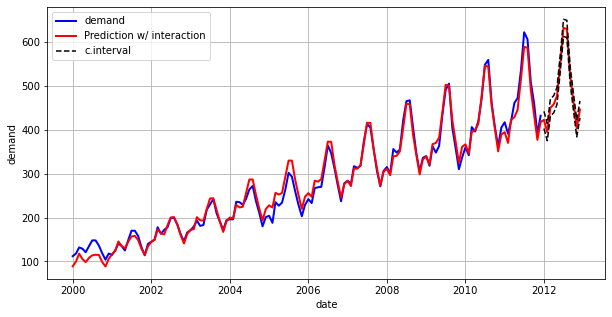

In [18]:
plt.figure(figsize = (10,5))
plt.plot(df1['Date1'],df1['demand'],\
linewidth = 2, c='b', label='demand')
plt.plot(df2['Date1'],df2['yhat2'],\
linewidth = 2, c='r', label='Prediction w/ interaction')
plt.plot(df4['Date1'],df4['lower'],'k--',label = 'c.interval')
plt.plot(df4['Date1'],df4['upper'],'k--')
plt.xlabel('date')
plt.ylabel('demand')
plt.legend()
plt.grid()